In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

    # load libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
location_encoder=LabelEncoder()
Sector_encoder=LabelEncoder()
job_encoder=LabelEncoder()
cv=CountVectorizer()
data=pd.read_csv("DataSet.csv")

In [14]:
def Convert(df):
    encod=df[["Location","Job_Description","salary","Month"]]
    encod["Location"]=location_encoder.fit_transform(df["Location"])
    encod["Job_Description"]=job_encoder.fit_transform(df["Job_Description"])
    encod["Sector"]=Sector_encoder.fit_transform(df["Sector"])
    trans=cv.fit_transform(df["Eligibility"])
    trans=pd.DataFrame(trans.todense(),columns=cv.get_feature_names())# Create a dataframe with only Eligibility values
    df2=pd.concat([encod,trans],axis=1)
    return df2
X=Convert(data)

In [10]:
y=data["vacancies"]


In [16]:
model=RandomForestRegressor()

In [24]:
train_sizes, train_scores, test_scores = learning_curve(model,
                                               X, y, cv=10, scoring= 'neg_mean_squared_error', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


In [27]:
train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(test_scores_mean, index = train_sizes))

Mean training scores

 146      104.328884
441       91.930796
736       79.530321
1032      78.784661
1327      74.164950
1623      71.624120
1918      69.492507
2213      68.775879
2509      61.254272
2804      59.255760
3100      59.173497
3395      56.972355
3690      56.028490
3986      54.365632
4281      53.691493
4576      55.084682
4872      53.430423
5167      51.605498
5463      50.964650
5758      49.519111
6053      48.324284
6349      47.905389
6644      46.169383
6940      46.248704
7235      44.619869
7530      44.610831
7826      44.470030
8121      43.445443
8416      42.170842
8712      42.415095
9007      41.729244
9303      41.578937
9598      41.461384
9893      41.255625
10189     41.207784
10484     40.036636
10780     40.304656
11075     38.922021
11370     39.321697
11666     37.919144
11961     37.731604
12256     37.988984
12552     38.068034
12847     37.870950
13143     37.511809
13438     37.732388
13733     37.497468
14029     37.076964
14324     36.8053

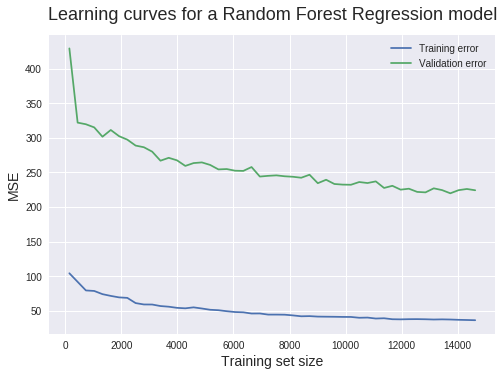

In [33]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest Regression model', fontsize = 18, y = 1.03)
plt.legend()

## Indication of Graph

The graph indicates low bias and Significant Variance, Which can be Solved by adding More data to it. But since This case can be solved Threfore it is not worst 

In [31]:
model1=XGBRegressor()

In [34]:
train_sizes, train_scores, test_scores = learning_curve(model1,
                                               X, y, cv=10, scoring= 'neg_mean_squared_error', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


In [38]:
train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(test_scores_mean, index = train_sizes))

Mean training scores

 146       0.003230
441       0.392777
736       3.346267
1032      9.546834
1327     13.704655
1623     19.354806
1918     20.767722
2213     29.146461
2509     35.222502
2804     40.816657
3100     46.580658
3395     48.567580
3690     48.432273
3986     61.208321
4281     54.104746
4576     64.758269
4872     68.204340
5167     62.475036
5463     61.465333
5758     60.642018
6053     63.706324
6349     62.782401
6644     60.338612
6940     61.132845
7235     63.204773
7530     63.384524
7826     64.951961
8121     64.533807
8416     69.091400
8712     65.125344
9007     65.957768
9303     71.519035
9598     68.602213
9893     68.174994
10189    70.758598
10484    70.942283
10780    71.868873
11075    71.947011
11370    72.600468
11666    71.559694
11961    71.539221
12256    72.391427
12552    73.476941
12847    72.965043
13143    73.497185
13438    73.448172
13733    73.086785
14029    74.857393
14324    72.937172
14620    73.807761
dtype: float64

 ----------

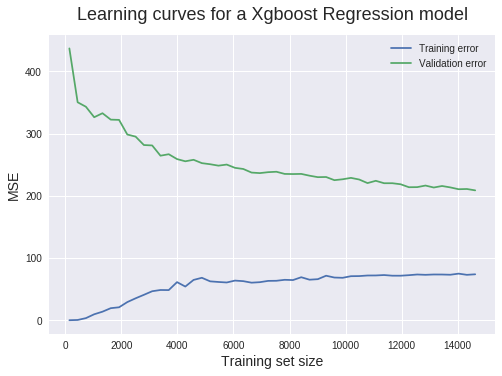

In [41]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Xgboost Regression model', fontsize = 18, y = 1.03)
plt.legend()